In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [114]:
file_path = ("heart_attack_vaccine_data.csv")
df = pd.read_csv(file_path);

In [115]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               550 non-null    int64  
 1   Age                      550 non-null    int64  
 2   Gender                   550 non-null    object 
 3   Vaccination Date         550 non-null    object 
 4   Vaccine Dose             550 non-null    object 
 5   Pre-existing Conditions  479 non-null    object 
 6   Heart Attack Date        153 non-null    object 
 7   Severity                 153 non-null    object 
 8   Outcome                  153 non-null    object 
 9   Location                 550 non-null    object 
 10  Blood Pressure           550 non-null    object 
 11  Cholesterol Level        550 non-null    int64  
 12  BMI                      550 non-null    float64
 13  Smoking History          550 non-null    object 
 14  Diabetes Status          5

In [116]:
df.describe()

,Patient ID,Age,Cholesterol Level,BMI
count,550.000000,550.000000,550.000000,550.000000
mean,275.500000,52.098182,223.143636,26.803273
std,158.915596,15.843192,43.267955,4.678322
min,1.000000,25.000000,150.000000,18.500000
25%,138.250000,39.000000,187.000000,23.000000
50%,275.500000,52.000000,221.000000,26.550000
75%,412.750000,66.000000,258.000000,30.700000
max,550.000000,80.000000,300.000000,35.000000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               550 non-null    int64  
 1   Age                      550 non-null    int64  
 2   Gender                   550 non-null    object 
 3   Vaccination Date         550 non-null    object 
 4   Vaccine Dose             550 non-null    object 
 5   Pre-existing Conditions  479 non-null    object 
 6   Heart Attack Date        153 non-null    object 
 7   Severity                 153 non-null    object 
 8   Outcome                  153 non-null    object 
 9   Location                 550 non-null    object 
 10  Blood Pressure           550 non-null    object 
 11  Cholesterol Level        550 non-null    int64  
 12  BMI                      550 non-null    float64
 13  Smoking History          550 non-null    object 
 14  Diabetes Status          5

In [118]:
df = df.drop_duplicates()


In [119]:
df.head(4)

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status
0,1,55,Female,2021-09-25,2nd Dose,Obesity,NaN,NaN,NaN,Chennai,Elevated,189,26.5,No,No
1,2,27,Male,2023-07-12,2nd Dose,NaN,NaN,NaN,NaN,Agra,Elevated,150,29.1,No,Yes
2,3,80,Male,2022-10-01,1st Dose,Hypertension,NaN,NaN,NaN,Surat,High,253,21.8,No,No
3,4,33,Male,2022-03-17,1st Dose,Smoking,NaN,NaN,NaN,Hyderabad,Normal,199,24.6,No,No


In [120]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

C:\Users\REHMAN COMPUTER\AppData\Local\Temp\ipykernel_21448\2083555711.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [121]:
df.columns
print(df.shape)

(550, 15)


In [122]:
df.head(4)

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status
0,1,55,Female,2021-09-25,2nd Dose,Obesity,NaN,NaN,NaN,Chennai,Elevated,189,26.5,0,0
1,2,27,Male,2023-07-12,2nd Dose,NaN,NaN,NaN,NaN,Agra,Elevated,150,29.1,0,1
2,3,80,Male,2022-10-01,1st Dose,Hypertension,NaN,NaN,NaN,Surat,High,253,21.8,0,0
3,4,33,Male,2022-03-17,1st Dose,Smoking,NaN,NaN,NaN,Hyderabad,Normal,199,24.6,0,0


In [123]:
# Create a flag column
df['Had_Heart_Attack'] = df['Heart Attack Date'].notna().astype(int)

# Replace severity and outcome if NaN
df['Severity'] = df['Severity'].fillna('None')
df['Outcome'] = df['Outcome'].fillna('None')

# For Pre-existing Conditions
df['Pre-existing Conditions'] = df['Pre-existing Conditions'].fillna('None')
df['Heart Attack Date'] = pd.to_datetime(df['Heart Attack Date'], errors='coerce')



In [124]:
df.head(4)


,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status,Had_Heart_Attack
0,1,55,Female,2021-09-25,2nd Dose,Obesity,NaT,None,None,Chennai,Elevated,189,26.5,0,0,0
1,2,27,Male,2023-07-12,2nd Dose,None,NaT,None,None,Agra,Elevated,150,29.1,0,1,0
2,3,80,Male,2022-10-01,1st Dose,Hypertension,NaT,None,None,Surat,High,253,21.8,0,0,0
3,4,33,Male,2022-03-17,1st Dose,Smoking,NaT,None,None,Hyderabad,Normal,199,24.6,0,0,0


In [125]:
print(df.shape)

(550, 16)


In [126]:
bp_mapping = {
    'Normal': 1,
    'Elevated': 2,
    'High': 3,
    'Very High': 4
}
df['BP_Score'] = df['Blood Pressure'].map(bp_mapping)


In [127]:
dose_mapping = {
    '1st Dose': 1,
    '2nd Dose': 2,
    'Booster': 3
}
df['Vaccine Dose'] = df['Vaccine Dose'].map(dose_mapping)

In [128]:
gender_mapping = {
    'Male': 1,
    'Female': 0
}
df['Gender'] = df['Gender'].map(gender_mapping)

In [129]:
df['BP_Score'] = df['BP_Score'].fillna(0)
df['BP_Score'] = df['BP_Score'].astype(int)

In [130]:
df['BP_Score']

0      2
1      2
2      3
3      1
4      1
      ..
545    2
546    4
547    2
548    3
549    3
Name: BP_Score, Length: 550, dtype: int32

In [131]:
df.head(4)

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status,Had_Heart_Attack,BP_Score
0,1,55,0,2021-09-25,2,Obesity,NaT,None,None,Chennai,Elevated,189,26.5,0,0,0,2
1,2,27,1,2023-07-12,2,None,NaT,None,None,Agra,Elevated,150,29.1,0,1,0,2
2,3,80,1,2022-10-01,1,Hypertension,NaT,None,None,Surat,High,253,21.8,0,0,0,3
3,4,33,1,2022-03-17,1,Smoking,NaT,None,None,Hyderabad,Normal,199,24.6,0,0,0,1


In [132]:
# Convert Vaccination Date to datetime
df['Vaccination Date'] = pd.to_datetime(df['Vaccination Date'], errors='coerce')

# Now create the Time_To_Heart_Attack column
df['Time_To_Heart_Attack'] = (df['Heart Attack Date'] - df['Vaccination Date']).dt.days


In [133]:
df.head()

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status,Had_Heart_Attack,BP_Score,Time_To_Heart_Attack
0,1,55,0,2021-09-25,2,Obesity,NaT,None,None,Chennai,Elevated,189,26.5,0,0,0,2,NaN
1,2,27,1,2023-07-12,2,None,NaT,None,None,Agra,Elevated,150,29.1,0,1,0,2,NaN
2,3,80,1,2022-10-01,1,Hypertension,NaT,None,None,Surat,High,253,21.8,0,0,0,3,NaN
3,4,33,1,2022-03-17,1,Smoking,NaT,None,None,Hyderabad,Normal,199,24.6,0,0,0,1,NaN
4,5,50,0,2023-03-26,2,Diabetes,NaT,None,None,Mumbai,Normal,273,21.0,0,0,0,1,NaN


In [134]:
df.to_csv('clean_vaccine_heart_data.csv', index=False)


In [135]:
df.dtypes

Patient ID                          int64
Age                                 int64
Gender                              int64
Vaccination Date           datetime64[ns]
Vaccine Dose                        int64
Pre-existing Conditions            object
Heart Attack Date          datetime64[ns]
Severity                           object
Outcome                            object
Location                           object
Blood Pressure                     object
Cholesterol Level                   int64
BMI                               float64
Smoking History                     int64
Diabetes Status                     int64
Had_Heart_Attack                    int32
BP_Score                            int32
Time_To_Heart_Attack              float64
dtype: object

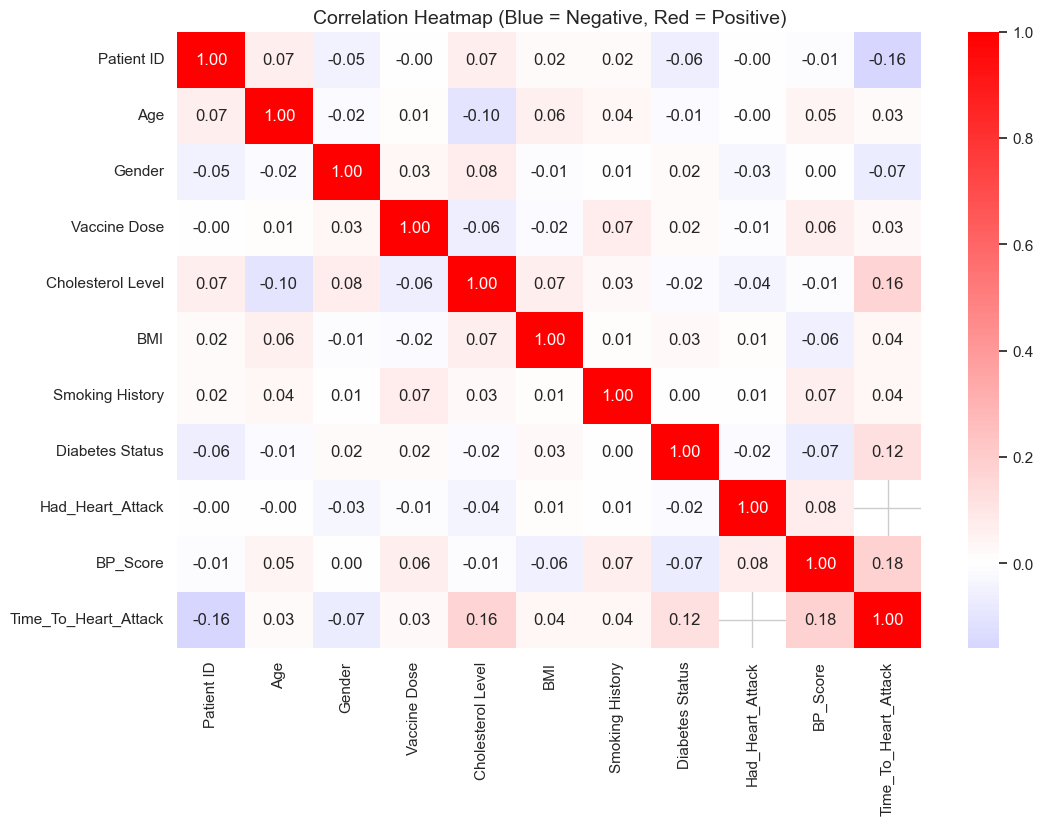

In [136]:
# Recompute the numeric-only dataframe
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])

# Compute and plot correlation
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='bwr',center=0)
plt.title('Correlation Heatmap (Blue = Negative, Red = Positive)', fontsize=14)
plt.show()



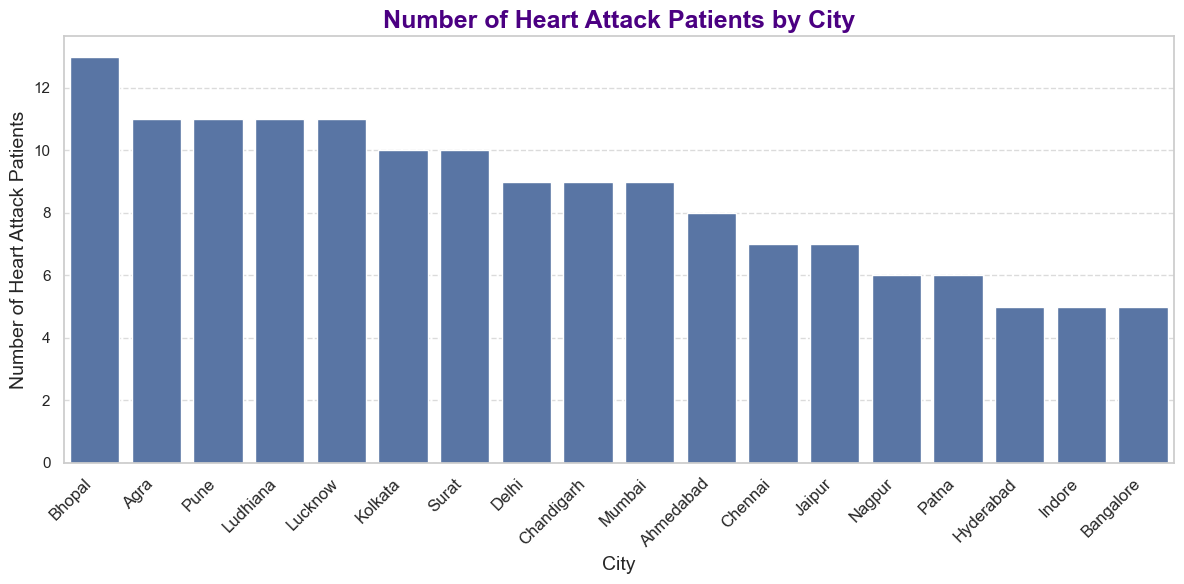

In [137]:
heart_attacks_by_city = df.groupby('Location')['Had_Heart_Attack'].sum().sort_values(ascending=False)

# Set plot style for better visuals
plt.figure(figsize=(12, 6))
sns.barplot(x=heart_attacks_by_city.index, y=heart_attacks_by_city.values)

# Add titles and labels
plt.title('Number of Heart Attack Patients by City', fontsize=18, fontweight='bold', color='#4B0082')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Heart Attack Patients', fontsize=14 )

# Improve x-axis labels with better font rotation and alignment
plt.xticks(rotation=45, ha='right', fontsize=12,)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for a more polished look
plt.tight_layout()

# Show plot
plt.show()

C:\Users\REHMAN COMPUTER\AppData\Local\Temp\ipykernel_21448\1324675139.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\REHMAN COMPUTER\AppData\Local\Temp\ipykernel_21448\1324675139.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




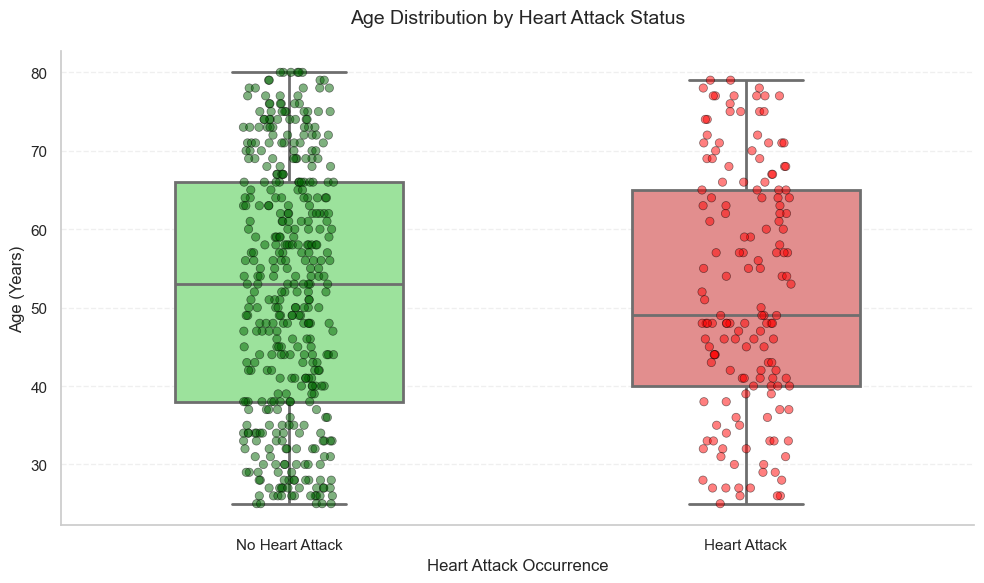

In [138]:
# plt.boxplot(df["Age"])
# # sns.stripplot(x = df["Age"], data=df, jitter=True, color='red', alpha=0.6)

# plt.title("Age Distribution")
# plt.ylabel("Age")
# plt.show()

# Convert 'Had_Heart_Attack' to categorical labels
df['Heart_Attack_Status'] = df['Had_Heart_Attack'].map({0: 'No Heart Attack', 1: 'Heart Attack'})

plt.figure(figsize=(10, 6))

# Create boxplot
boxplot = sns.boxplot(
    x='Heart_Attack_Status', 
    y='Age',
    data=df,
    palette={'No Heart Attack': 'lightgreen', 'Heart Attack': 'lightcoral'},
    width=0.5,
    linewidth=2,
    flierprops=dict(marker='o', markersize=8, markerfacecolor='grey')
)

# Add stripplot overlay
stripplot = sns.stripplot(
    x='Heart_Attack_Status',
    y='Age',
    data=df,
    jitter=True,
    alpha=0.5,
    size=6,
    palette={'No Heart Attack': 'darkgreen', 'Heart Attack': 'red'},
    edgecolor='black',
    linewidth=0.5
)

# Customize plot appearance
plt.title('Age Distribution by Heart Attack Status', fontsize=14, pad=20)
plt.xlabel('Heart Attack Occurrence', fontsize=12)
plt.ylabel('Age (Years)', fontsize=12)
plt.xticks(fontsize=11)

# # Add median value annotations
# medians = df.groupby('Heart_Attack_Status')['Age'].median()
# for xtick in boxplot.get_xticks():
#     plt.text(xtick, medians[xtick]+1, f'Median: {medians[xtick]:.0f}', 
#              ha='center', va='bottom', fontsize=11, color='black',
#              bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Improve grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

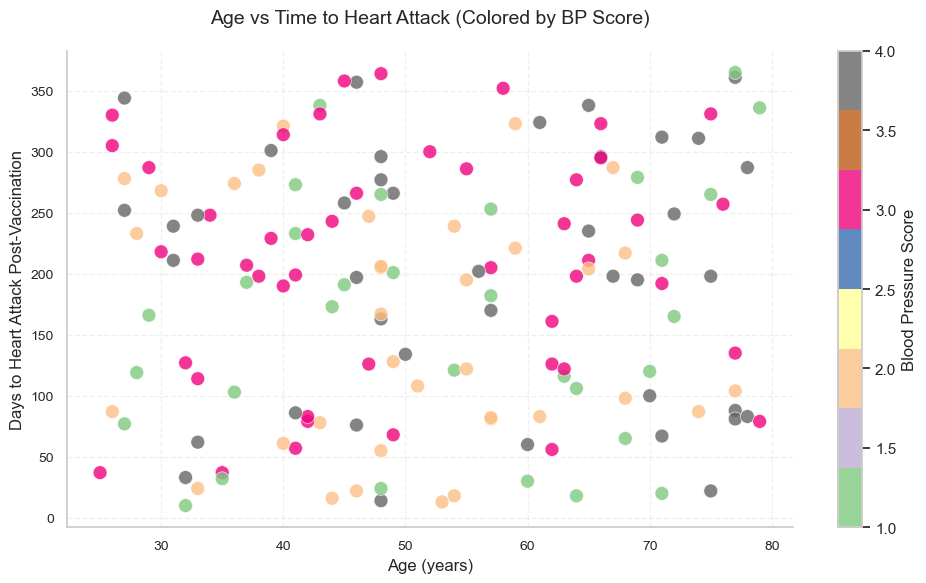

In [139]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create scatter plot with enhanced features
scatter = plt.scatter(
    df["Age"], 
    df["Time_To_Heart_Attack"],
    c=df["BP_Score"],  # Color by BP_Score
    cmap="Accent",    # Color map
    alpha=0.8,         # Transparency
    s=100,             # Marker size
    edgecolor='w',     # White edges
    linewidth=0.5      # Edge width
)

# Add labels and title
plt.title("Age vs Time to Heart Attack (Colored by BP Score)", fontsize=14, pad=20)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Days to Heart Attack Post-Vaccination", fontsize=12)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Blood Pressure Score', fontsize=12)


# Improve tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove top and right spines
sns.despine()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

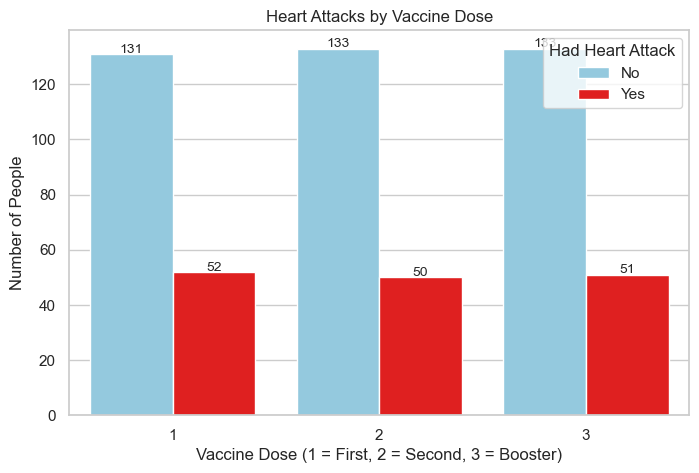

In [ ]:
# sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Vaccine Dose', hue='Had_Heart_Attack', palette=['skyblue', 'red'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,   # x position
            height + 0.5,                     # y position
            int(height),                      # value to show
            ha="center", fontsize=10
        )

# Labels
plt.title('Heart Attacks by Vaccine Dose')
plt.xlabel('Vaccine Dose (1 = First, 2 = Second, 3 = Booster)')
plt.ylabel('Number of People')
plt.legend(title='Had Heart Attack', labels=['No', 'Yes'])

plt.show()

C:\Users\REHMAN COMPUTER\AppData\Local\Temp\ipykernel_21448\991973610.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




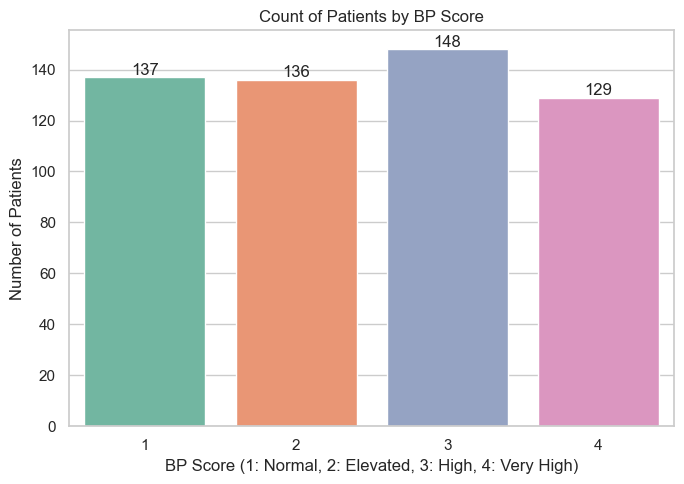

In [146]:
# Filter out the rows where BP_Score is not in the range of 1 to 4
filtered_df = df[df['BP_Score'].isin([1, 2, 3, 4])]

plt.figure(figsize=(7, 5))
sns.countplot(x='BP_Score', data=filtered_df, palette='Set2')

plt.title('Count of Patients by BP Score')
plt.xlabel('BP Score (1: Normal, 2: Elevated, 3: High, 4: Very High)')
plt.ylabel('Number of Patients')

# Add bar labels
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 1,
             int(p.get_height()), ha='center')

plt.tight_layout()
plt.show()


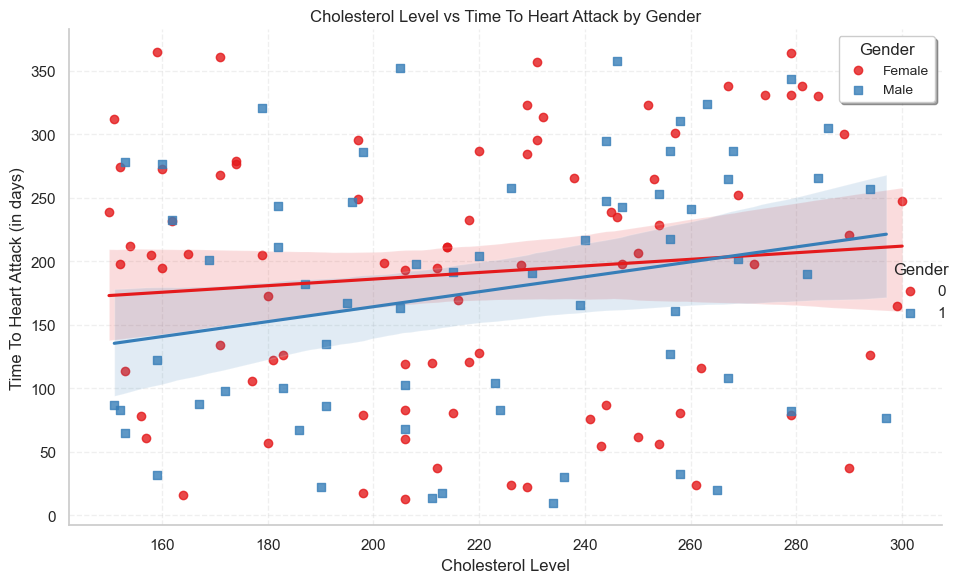

In [142]:
g = sns.lmplot(
   x='Cholesterol Level',
   y='Time_To_Heart_Attack',
   data=df[df["Had_Heart_Attack"] == 1],
   hue='Gender',
   palette='Set1',
   height=6,
   aspect=1.5,
   markers=["o", "s"]
)

# Access the underlying axes object
ax = g.ax

# Add labels and title
ax.set_title('Cholesterol Level vs Time To Heart Attack by Gender')
ax.set_xlabel('Cholesterol Level')
ax.set_ylabel('Time To Heart Attack (in days)')
ax.grid(True, linestyle='--', alpha=0.3)

# Fix legend (it's already there from hue, no need to reset manually)
# Just update the legend title if needed
# Update the legend with proper labels and title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], title='Gender', loc='best', fontsize=10, title_fontsize=12, frameon=True, shadow=True)

plt.tight_layout()
plt.show()


In [143]:
px.scatter(
    df, 
    x='Age', 
    y='Time_To_Heart_Attack', 
    color='Gender', 
    color_discrete_map={1: 'yellow', 0: 'blue'},
    labels={'Gender': 'Gender (Yellow: Male, Blue: Female)'}
)